# Student Info
- s3716853
- Matthew Eletva

<a name="table_of_contents"></a>
# Table of contents
1. [Data Reading and Initial Transformations](#init_read)
2. [Initial Analysis](#init_analysis)
3. [Evaluation Metric](#evaluation_metric)
4. [Data Splitting](#data_split)
5. [Approach One: Logistic Regression](#logistic_regression)
    1. [Ensuring Split Integrity](#logistic_regression_split)
    2. [Baseline Model](#logistic_regression_polynomial)
    3. [Feature Scaling](#logistic_regression_feature_scaling)
    4. [Analysis](#logistic_regression_analysis)
6. [Approach Two: Decision Tree](#tree)
    1. [Hyper Parameter Tuning](#tree_param_tune)
    2. [Decision Tree Analysis](#tree_analysis)
    3. [Random Forrest](#forrest)
        1. [Attempt 1: Depth of 51](#forrest_1)
        2. [Attempt 2: Depth of 11](#forrest_2)
        3. [Attempt 3: Improving Upon Depth of 11](#forrest_3)

# Assignment Notes
- "Predict if a given patient (i.e. newborn child) will be discharged from the hospital within 3 days (class 0) or will stay in hospital beyond that - 4 days or more (class 1)”
- Binary Classification problem
    - Class 0 (3 Days)
    - Class 1 (4 or more days)

# Approaches to Take
- ~~Multivariate Linear Regression~~
    - Due to the tasks nature as a binary classification problem, this approach will not be necessary
- Multivariate logistic regression
- Decision Trees

<a name="init_read"></a>
# Data Reading and Initial Transformations 
[To Table of Contents](#table_of_contents)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
train_data = pd.read_csv("train_data.csv")

In [8]:
# Just being sure the data loaded fine
train_data.head(3)

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1


In [9]:
train_data.columns

Index(['ID', 'HealthServiceArea', 'Gender', 'Race', 'TypeOfAdmission',
       'CCSProcedureCode', 'APRSeverityOfIllnessCode', 'PaymentTypology',
       'BirthWeight', 'EmergencyDepartmentIndicator', 'AverageCostInCounty',
       'AverageChargesInCounty', 'AverageCostInFacility',
       'AverageChargesInFacility', 'AverageIncomeInZipCode', 'LengthOfStay'],
      dtype='object')

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID                            59966 non-null  int64 
 1   HealthServiceArea             59966 non-null  object
 2   Gender                        59966 non-null  object
 3   Race                          59966 non-null  object
 4   TypeOfAdmission               59966 non-null  object
 5   CCSProcedureCode              59966 non-null  int64 
 6   APRSeverityOfIllnessCode      59966 non-null  int64 
 7   PaymentTypology               59966 non-null  object
 8   BirthWeight                   59966 non-null  int64 
 9   EmergencyDepartmentIndicator  59966 non-null  object
 10  AverageCostInCounty           59966 non-null  int64 
 11  AverageChargesInCounty        59966 non-null  int64 
 12  AverageCostInFacility         59966 non-null  int64 
 13  AverageChargesIn

In [11]:
# modifying LengthOfStay to represent Class 0 (True) and class 1 (False)
for i in train_data.index:
    train_data.at[i, "LengthOfStay"]
    if train_data.at[i, "LengthOfStay"] < 4:
        train_data.at[i, "LengthOfStay"] = 1
    else:
        train_data.at[i, "LengthOfStay"] = 0

In [6]:
#train_data["LengthOfStay"] = train_data["LengthOfStay"].astype("boolean")

In [12]:
# Dropping non-attribute columns from dataframe
train_data = train_data.drop(columns=['ID', 'HealthServiceArea'])

In [13]:
# Convert categorical datat to categorical datatype
category_attributes = ["Gender", "Race", "TypeOfAdmission", "CCSProcedureCode", "PaymentTypology", "EmergencyDepartmentIndicator"]
for col in train_data.columns:
    if col in category_attributes:
        train_data[col] = train_data[col].astype('category')

In [10]:
# ensuring data converted ok
train_data.head(3)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Gender                        59966 non-null  category
 1   Race                          59966 non-null  category
 2   TypeOfAdmission               59966 non-null  category
 3   CCSProcedureCode              59966 non-null  category
 4   APRSeverityOfIllnessCode      59966 non-null  int64   
 5   PaymentTypology               59966 non-null  category
 6   BirthWeight                   59966 non-null  int64   
 7   EmergencyDepartmentIndicator  59966 non-null  category
 8   AverageCostInCounty           59966 non-null  int64   
 9   AverageChargesInCounty        59966 non-null  int64   
 10  AverageCostInFacility         59966 non-null  int64   
 11  AverageChargesInFacility      59966 non-null  int64   
 12  AverageIncomeInZipCode        59966 non-null  

In [15]:
train_data = pd.get_dummies(train_data)

In [16]:
train_data.head()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,1,3700,2611,9227,1751,8951,45,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2900,3242,8966,3338,6409,34,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,3200,3155,11381,4980,9323,45,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,3300,3155,11381,5826,15680,59,1,1,0,...,0,0,0,0,0,1,0,0,1,0
4,1,2600,2611,9227,6000,14344,59,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [17]:
pd.isna(train_data).sum()

APRSeverityOfIllnessCode                     0
BirthWeight                                  0
AverageCostInCounty                          0
AverageChargesInCounty                       0
AverageCostInFacility                        0
AverageChargesInFacility                     0
AverageIncomeInZipCode                       0
LengthOfStay                                 0
Gender_F                                     0
Gender_M                                     0
Gender_U                                     0
Race_Black/African American                  0
Race_Multi-racial                            0
Race_Other Race                              0
Race_White                                   0
TypeOfAdmission_Elective                     0
TypeOfAdmission_Emergency                    0
TypeOfAdmission_Newborn                      0
TypeOfAdmission_Urgent                       0
CCSProcedureCode_-1                          0
CCSProcedureCode_0                           0
CCSProcedureC

In [21]:
# for col in train_data.columns:
#     if train_data.dtypes[col] == 'int64':
#         train_data[col] = train_data[col].astype('int16')

In [14]:
train_data.describe()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,...,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,0.832055,0.483391,0.516593,...,0.014158,0.009088,0.478988,0.000734,0.001968,0.260281,0.033085,0.000367,0.991445,0.008555
std,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,0.373821,0.499728,0.499729,...,0.118143,0.094900,0.499562,0.027078,0.044316,0.438791,0.178861,0.019151,0.092097,0.092097
min,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
print(train_data.dtypes)

APRSeverityOfIllnessCode                     int64
BirthWeight                                  int64
AverageCostInCounty                          int64
AverageChargesInCounty                       int64
AverageCostInFacility                        int64
AverageChargesInFacility                     int64
AverageIncomeInZipCode                       int64
LengthOfStay                                 int64
Gender_F                                     uint8
Gender_M                                     uint8
Gender_U                                     uint8
Race_Black/African American                  uint8
Race_Multi-racial                            uint8
Race_Other Race                              uint8
Race_White                                   uint8
TypeOfAdmission_Elective                     uint8
TypeOfAdmission_Emergency                    uint8
TypeOfAdmission_Newborn                      uint8
TypeOfAdmission_Urgent                       uint8
CCSProcedureCode_-1            

<a name="init_analysis"></a>
# Initial Analysis

[To Table of Contents](#table_of_contents)

In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   BirthWeight                                59966 non-null  int64
 1   AverageCostInCounty                        59966 non-null  int64
 2   AverageChargesInCounty                     59966 non-null  int64
 3   AverageCostInFacility                      59966 non-null  int64
 4   AverageChargesInFacility                   59966 non-null  int64
 5   AverageIncomeInZipCode                     59966 non-null  int64
 6   LengthOfStay                               59966 non-null  int64
 7   Gender_F                                   59966 non-null  uint8
 8   Gender_M                                   59966 non-null  uint8
 9   Gender_U                                   59966 non-null  uint8
 10  Race_Black/African American                599

In [42]:
train_data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,...,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,0.832055,0.483391,...,0.014158,0.009088,0.478988,0.000734,0.001968,0.260281,0.033085,0.000367,0.991445,0.008555
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,0.373821,0.499728,...,0.118143,0.094900,0.499562,0.027078,0.044316,0.438791,0.178861,0.019151,0.092097,0.092097
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
train_data.describe()

,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,Gender_U,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,...,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,0.832055,0.483391,0.516593,0.000017,...,0.014158,0.009088,0.478988,0.000734,0.001968,0.260281,0.033085,0.000367,0.991445,0.008555
std,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,0.373821,0.499728,0.499729,0.004084,...,0.118143,0.094900,0.499562,0.027078,0.044316,0.438791,0.178861,0.019151,0.092097,0.092097
min,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


ValueError: num must be 1 <= num <= 20, not 21

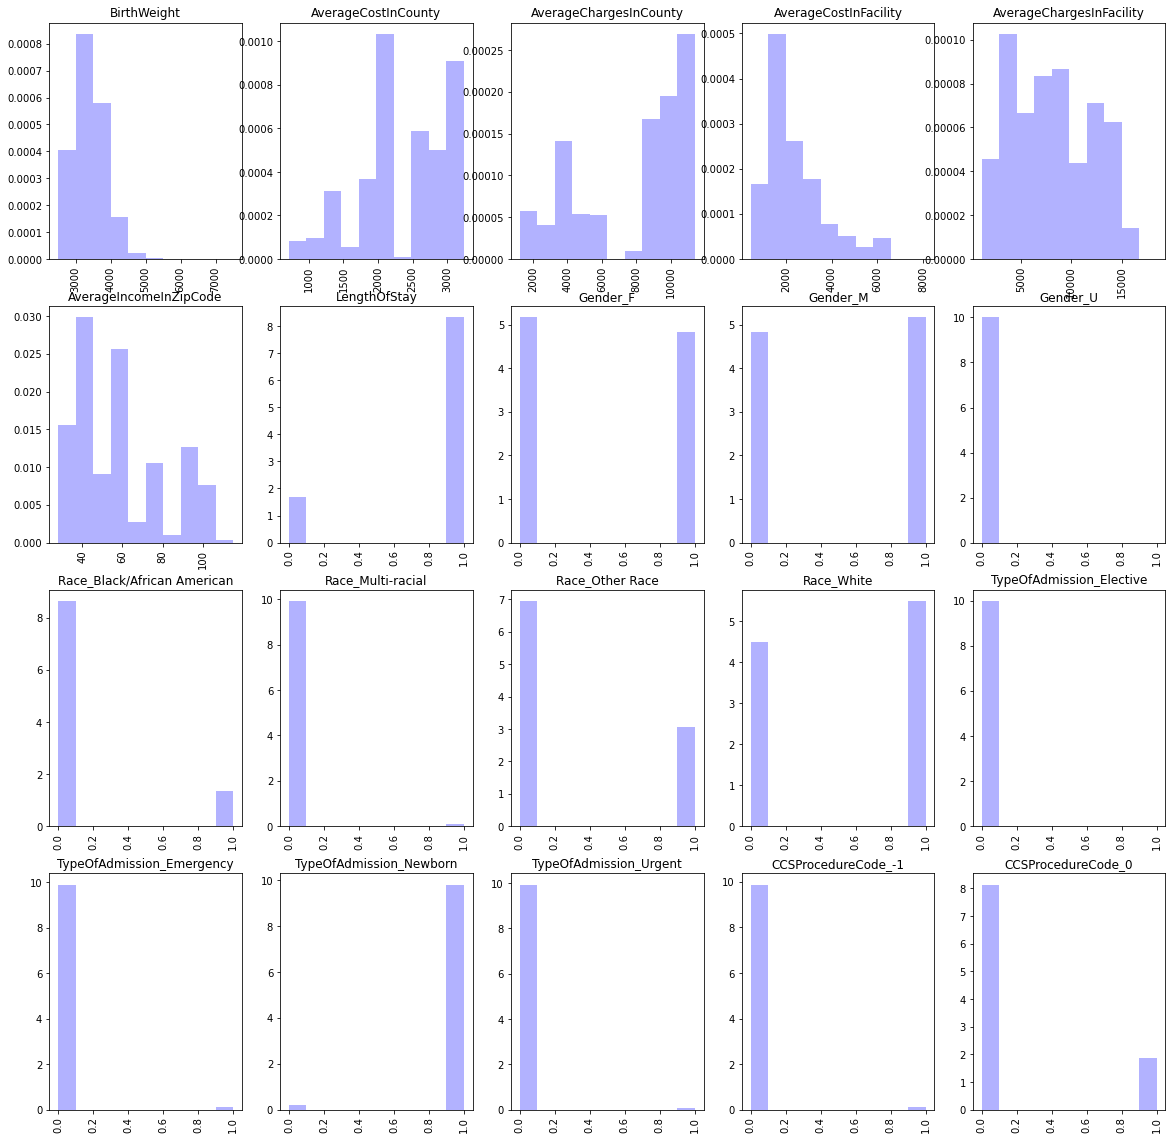

In [49]:
plt.figure(figsize=(20,20))
for i, col in enumerate(train_data.columns):
    data_to_plot = 0
    if col == "LengthOfStay":
        data_to_plot = train_data[col].astype("int")
    else:
        data_to_plot = train_data[col]
    plt.subplot(4,5,i+1)
    plt.hist(data_to_plot, alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation="vertical")

#### Observations
- Gender
    - Few elements with Gender value of 'U'
        - Could cause issues for test data if 'U' is present there
- Race
    - 'White' is most common race by a large margin, followed by "Other Race". Probably won't be a great metric for the algorithm due to 'African American' and 'White' being the only specific ehtnicities.
        - Very few 'Multi Race' will probably lead to issues when predicting due to low data ammount to train on
        - African American will probably struggle for similar reasons as there are so few compared to White
- TypeOfAdmission
    - Vast majority of data has TypeOfAdmition as 'Newborn', other options have nearly none in comparison
        - Probabaly won't help with the algorithm all that much due to the heavy skew.
        - Could still have some effect (eg. Emergency could be more likely to be class 1).
- CCSProcedureCodes
    - Most CCSProcedureCodes are the one above 200, may be good to look into what they mean for your own analysis
- APRSeverityOfIllness 
    - Skews heavily towards 1 (Minor).
    - Few data points with value 4 (Extreme)
- PaymentTypology
    - Medicaid skew
- BirthWeight
    - Tend to be from 2500 - 4000
    - Heavy outlier (7500) present. 
- EmergencyDepartmentIndicator
    - Heavily skewed towards 'N'
- AverageCostInCounty
- AverageChargesInCounty
- AverageCostInFacility
    - Skews towards lower values
- AverageChargesInFacility
- AverageIncomeInZipCode
- LengthOfStay
    - Most cases are class 0 (represented in histogram as "1")

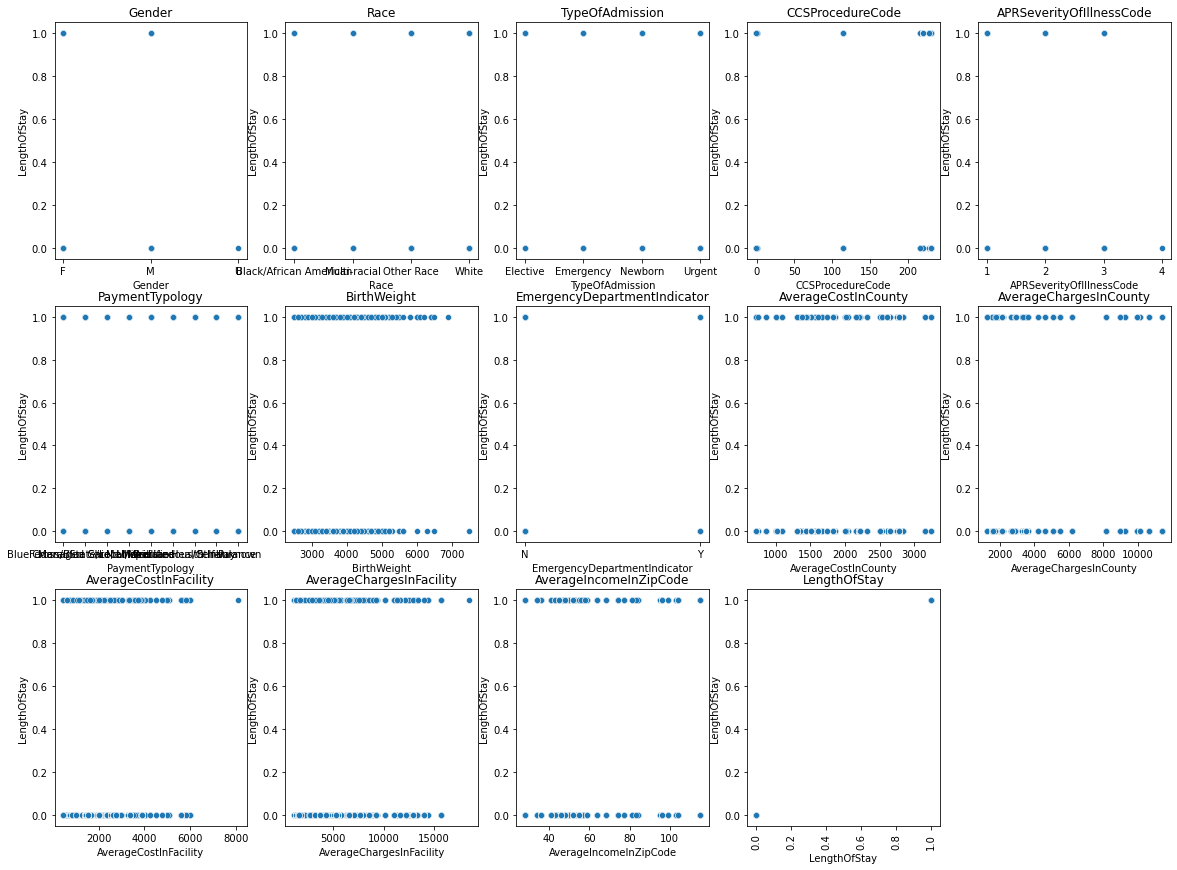

In [75]:
# Scatterplot doesnt really give much information

plt.figure(figsize=(20,20))

for i, col in enumerate(train_data.columns):
    plt.subplot(4,5,i+1)
    sns.scatterplot(data=train_data, x=col, y='LengthOfStay')
#     sns.regplot(x=col,y='LengthOfStay', data=trainData)
    plt.title(col)


plt.xticks(rotation='vertical')
plt.show()

### Observations

- No obvious relationship can be seen between LengthOfStay and any single variable.

- Not a single unknown gender patient that is class 0. ML Algorithm could pick up on this.

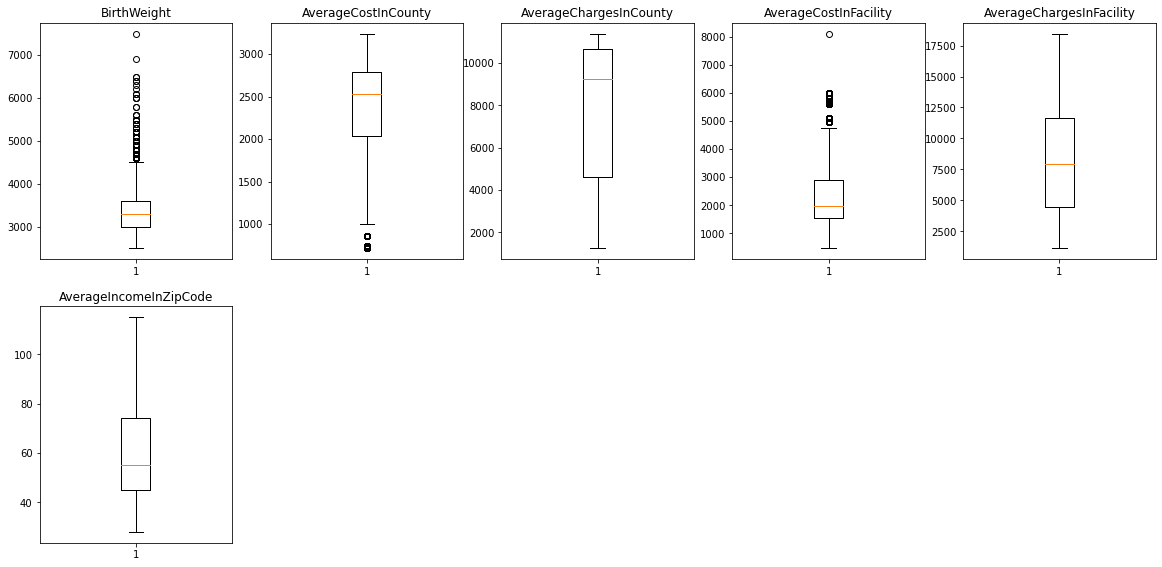

In [77]:
plt.figure(figsize=(20,20))
colCount = 0
for i, col in enumerate(train_data.columns):
    if train_data.dtypes[col] == 'int64':
        plt.subplot(4,5,colCount+1)
        plt.boxplot(train_data[col])
        plt.title(col)
        colCount += 1
plt.show()

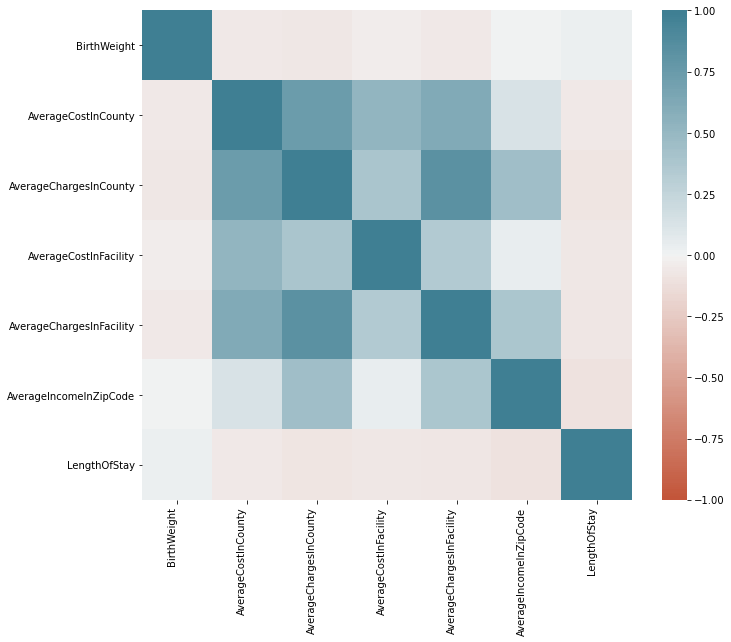

In [78]:
f, ax = plt.subplots(figsize=(11, 9))
corr = train_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

###### Categorical Variables
- Ordinal
    - APRSeverityOfIllnessCode
- Nominal
    - Gender
    - Race
    - TypeOfAdmission
    - CCSProcedureCode
    - PaymentTypology
    - EmergencyDepartmentIndicator

#### Numerical Variables
- Continuous
    - BirthWeight
    - AverageCostInCounty
    - AverageChargesInCounty
    - AverageCostInFacility
    - AverageChargesInFacility
    - AverageIncomeInZipCode
- Discrete
    - NONE

#### Initial Assumptions and Comments
- Currently assuming the following variables will have the greatest impact on a patient being class 0 or 1. These are purely assumptions, nothing has been put towards proving them. Further inspection required
    - AverageIncomeInZipCode
        - Lower income may have a higher chance of complications due to issues such as having less money to go to the doctor more often.
    - BirthWeight
        - Too great or too low a birthweight could increase chance of complications, thus having a longer stay.
    - TypeOfAdmission 
        - An 'Emergency', 'Trauma', or 'Urgent' admission would probabaly need to stay in the hospital longer 

### Observations
- LengthOfStay seems to have the greatest correlation with APRSeverityOfIllnessCode
- BirthWeight is the only negatively correlated attribute
    - As birthweights decrease, length of stay increases

<a name="evaluation_metric"></a>
# Deciding the Evaluation Metric 
[To Table of Contents](#table_of_contents)

As the purpose of this machine learning task is to help improve resource allocation at hospitals by predicting how long a patient will stay the most important metric would be to ensure that Class 1 (>3days) patients are not incorrectly categorised as Class 0 (<3Days) patients, as this will lead to that patient requiring more resources than anticipated. The inverse scenario of a Class 0 (<3days) patient being incorrectly predicted as a Class 1 (>3days) is not as harmful as it will lead to the patient requiring less resources than predicted so those resources can simply be put towards other patients. 

Given this, I believe the most important metric when analysing this problem would be to ensure false positives are as low as possible. As such, I have picked Precision as my metric for evaluation.

Below is a diagram to make this more clear

<img src="https://i.imgur.com/aK5h1lU.png" width="50%">

In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 

def get_precision_score(clf, *args):
    
    results = []
    
    for prediction_data in args:
        prediction = clf.predict(prediction_data[0])
        precision = precision_score(prediction_data[1], prediction, average="macro")
        
        results.append(precision)
    return results

def get_f1_scores(clf, *args):
    
    #this is to deal with code that was written before this function rewrite
    if not isinstance(args[0], tuple):
        return get_f1_scores_old(clf, args[0], args[1], args[2], args[3])
    
    results = []
    
    for prediction_data in args:
        prediction = clf.predict(prediction_data[0])
        f1 = f1_score(prediction_data[1], prediction, average="macro")
        
        results.append(f1)
    
    return results

def get_f1_scores_old(clf, train_X, train_y, val_X, val_y):
    train_pred = clf.predict(train_X)
    val_pred = clf.predict(val_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    val_f1 = f1_score(val_y, val_pred, average='macro')
    
    return train_f1, val_f1

def print_eval_metrics(clf, labels, *args):
    
    pecision_scores = get_precision_score(clf, *args)
    f1_scores = get_f1_scores(clf, *args)
    
    for i in range(len(labels)):
        print("{} f1 Score: {:.3f}".format(labels[i], f1_scores[i]))
        print("{} Precision Score: {:.3f}".format(labels[i], pecision_scores[i]))
    
    # Returns results in case scores are needed
    return f1_scores, pecision_scores
        

<a name="data_split"></a>
# Data Splitting 
[To Table of Contents](#table_of_contents)

- Using Hold-out validation, as large size of our dataset should help ensure that a good split is made.
- Will also be quicker than cross-validation, which will be important because our dataset is quite large.

In [24]:
from sklearn.model_selection import train_test_split

def split_data(data):
    # Splitting data to get a test split to use on my final hypothesis
    with pd.option_context('mode.chained_assignment', None):
        train_split, test_split = train_test_split(data, test_size=0.2, 
                                                 shuffle=True,random_state=0)
    with pd.option_context('mode.chained_assignment', None):
        train_split, validate_split = train_test_split(train_split, test_size=0.25, 
                                                 shuffle=True,random_state=0)
    return train_split, test_split, validate_split

<a name="logistic_regression"></a>
# Approach One: Logistic Regression
[To Table of Contents](#table_of_contents)

In [ ]:
train_data_train_split, train_data_test_split, train_data_validate_split = split_data(train_data):

In [43]:
train_data_train_split.info()
train_data_test_split.info()
train_data_validate_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35979 entries, 47077 to 39288
Data columns (total 40 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   BirthWeight                                35979 non-null  int64
 1   AverageCostInCounty                        35979 non-null  int64
 2   AverageChargesInCounty                     35979 non-null  int64
 3   AverageCostInFacility                      35979 non-null  int64
 4   AverageChargesInFacility                   35979 non-null  int64
 5   AverageIncomeInZipCode                     35979 non-null  int64
 6   LengthOfStay                               35979 non-null  int64
 7   Gender_F                                   35979 non-null  uint8
 8   Gender_M                                   35979 non-null  uint8
 9   Gender_U                                   35979 non-null  uint8
 10  Race_Black/African American               

<a name="logistic_regression_split"></a>
## Ensuring split has kept similar data shape 
[To Table of Contents](#table_of_contents)

- We want to enusre the random split kept each set similar in distribution

In [66]:
def create_bar_graph_for_attributes(dataframe):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(dataframe.columns):
        data_to_plot = 0
        if col == "LengthOfStay":
            data_to_plot = dataframe[col].astype("int")
        else:
            data_to_plot = dataframe[col]
        plt.subplot(4,5,i+1)
        plt.hist(data_to_plot, alpha=0.3, color='b', density=True)
        plt.title(col)
        plt.xticks(rotation="vertical")

def create_box_plot_for_attributes(dataframe):
    plt.figure(figsize=(20,20))
    colCount = 0
    for i, col in enumerate(dataframe.columns):
        if dataframe.dtypes[col] == 'int64':
            plt.subplot(4,5,colCount+1)
            plt.boxplot(dataframe[col])
            plt.title(col)
            colCount += 1
    plt.show()
def create_scatterplot_for_attributes(dataframe, y_column="LengthOfStay"):
    plt.figure(figsize=(20,20))

    for i, col in enumerate(dataframe.columns):
        plt.subplot(4,5,i+1)
        sns.scatterplot(data=dataframe, x=col, y=y_column)
    #     sns.regplot(x=col,y='LengthOfStay', data=dataframe)
        plt.title(col)


    plt.xticks(rotation='vertical')
    plt.show()

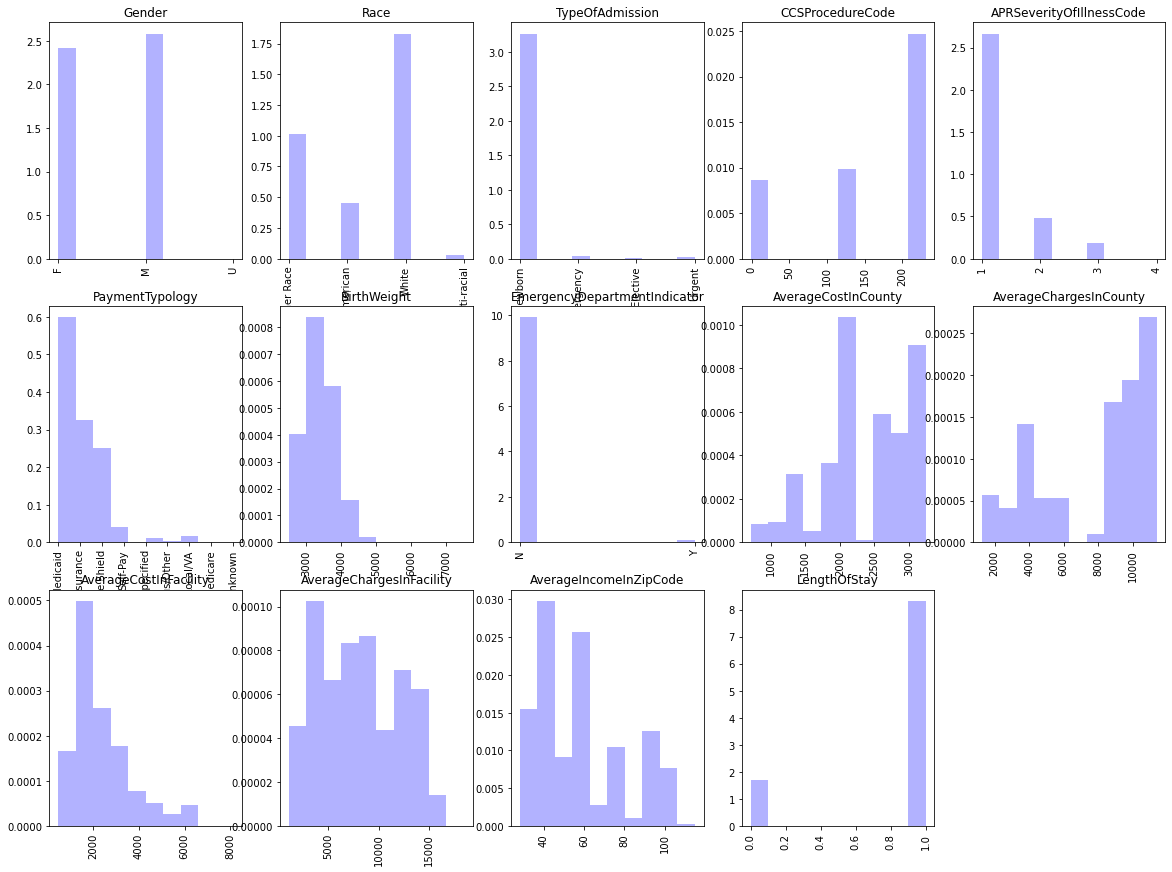

In [84]:
create_bar_graph_for_attributes(train_data_train_split)

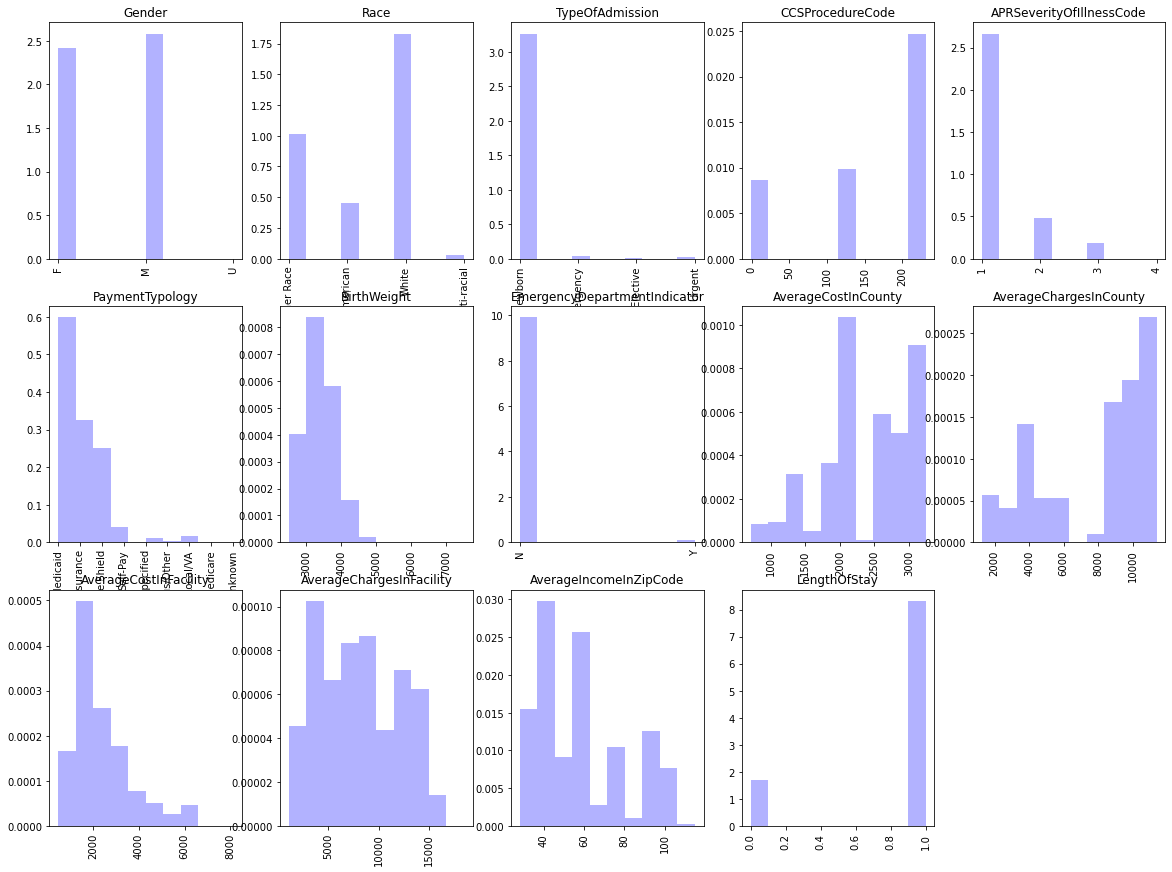

In [85]:
create_bar_graph_for_attributes(train_data_test_split)

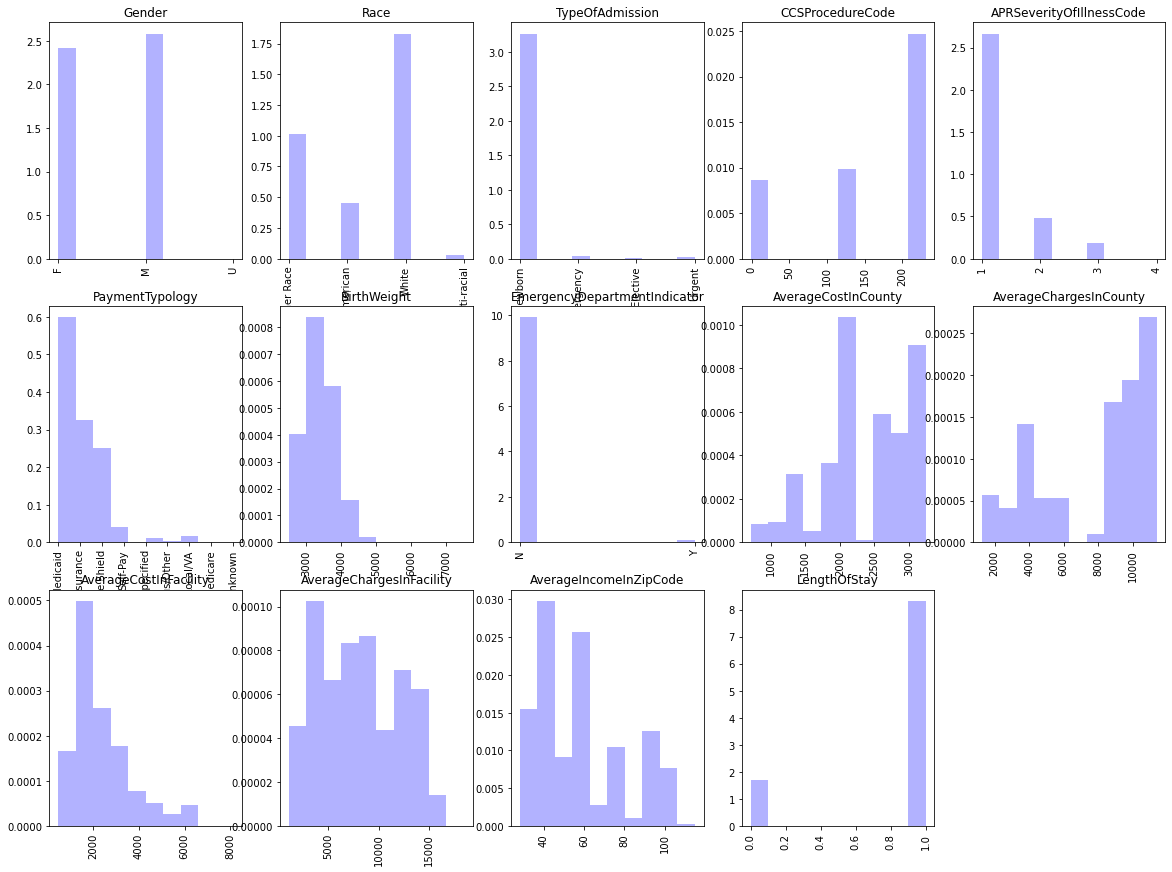

In [93]:
create_bar_graph_for_attributes(train_data_validate_split)

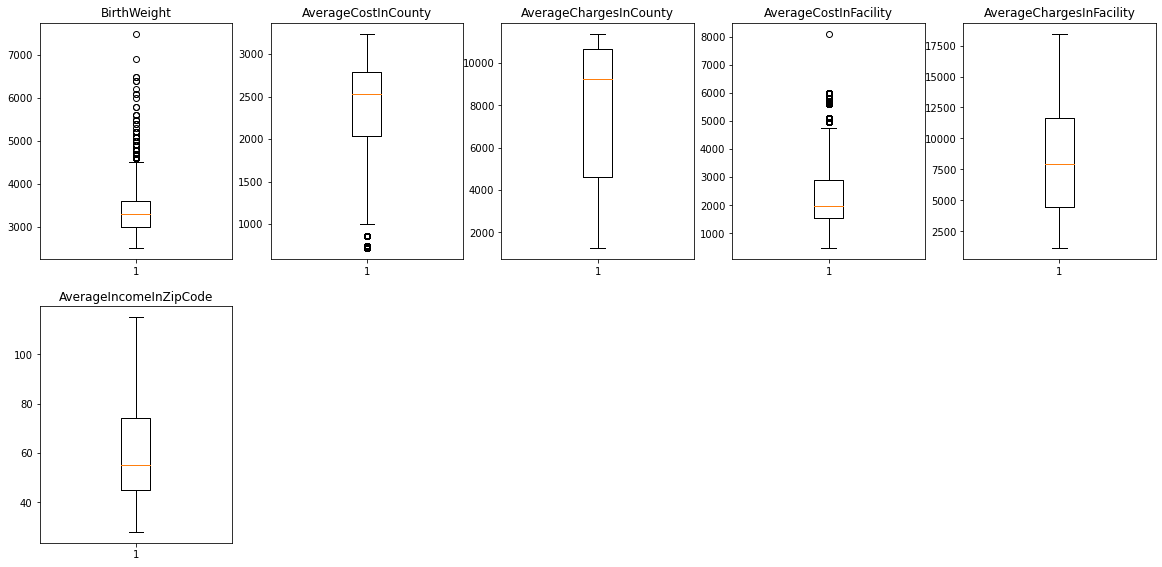

In [86]:
create_box_plot_for_attributes(train_data_train_split)

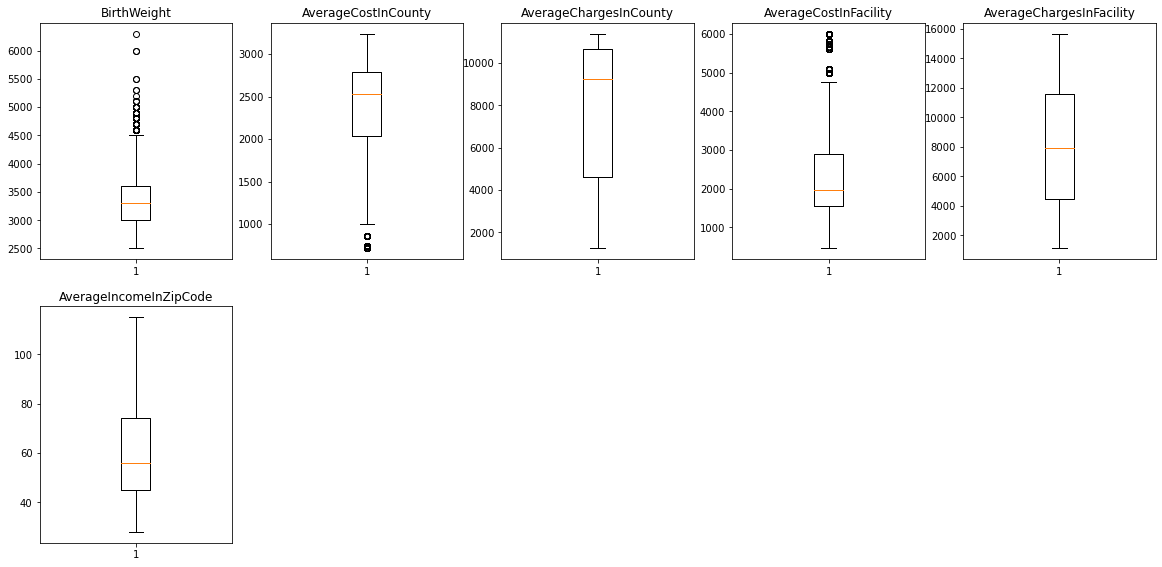

In [87]:
create_box_plot_for_attributes(train_data_test_split)

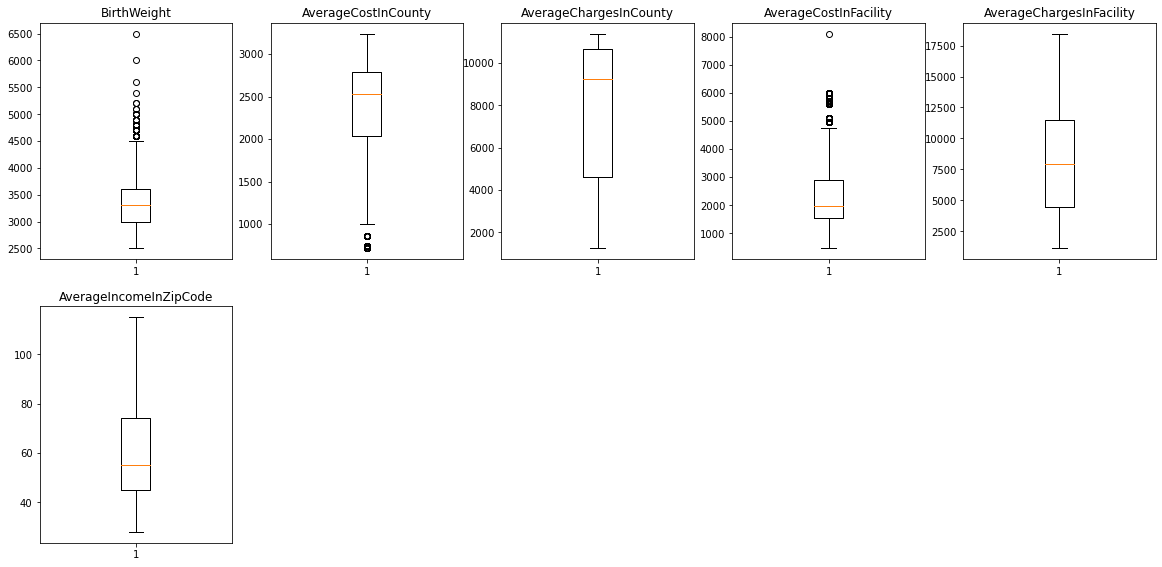

In [94]:
create_box_plot_for_attributes(train_data_validate_split)

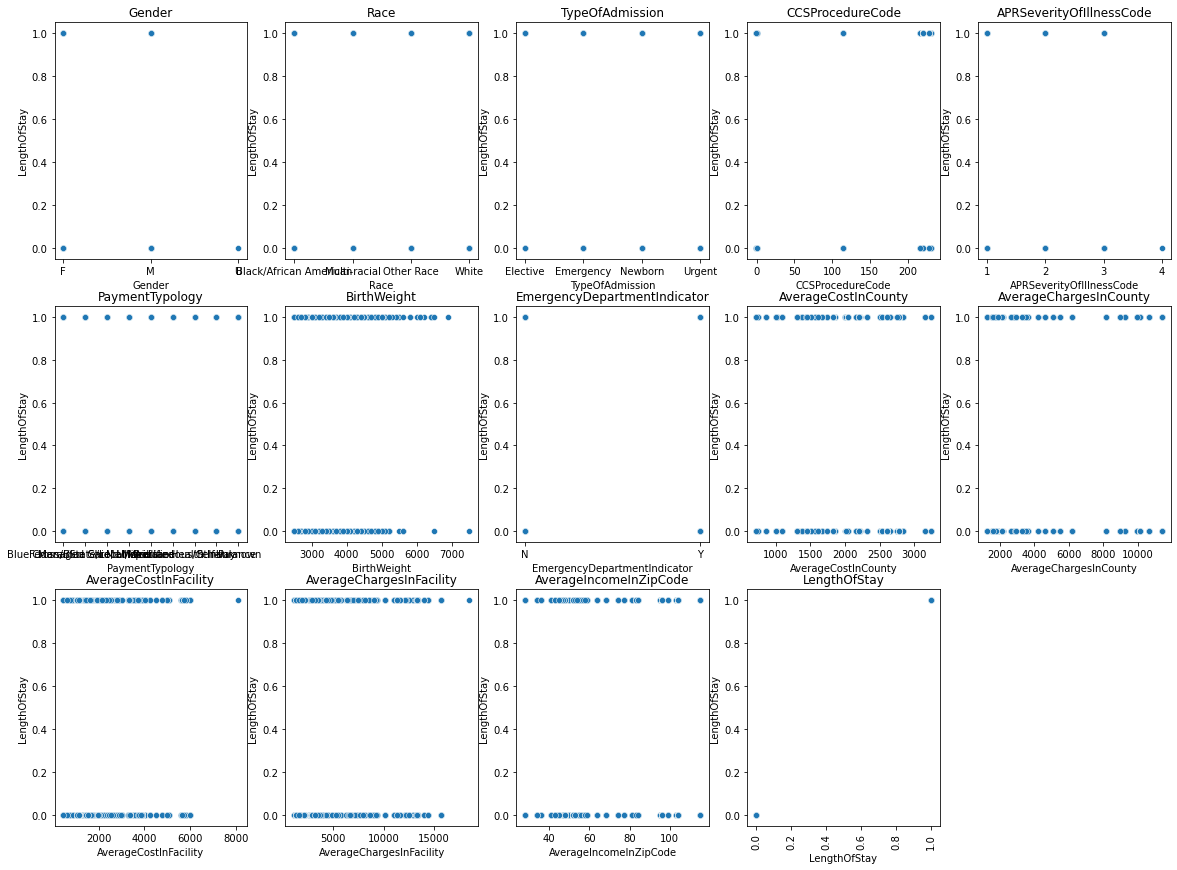

In [88]:
create_scatterplot_for_attributes(train_data_train_split)

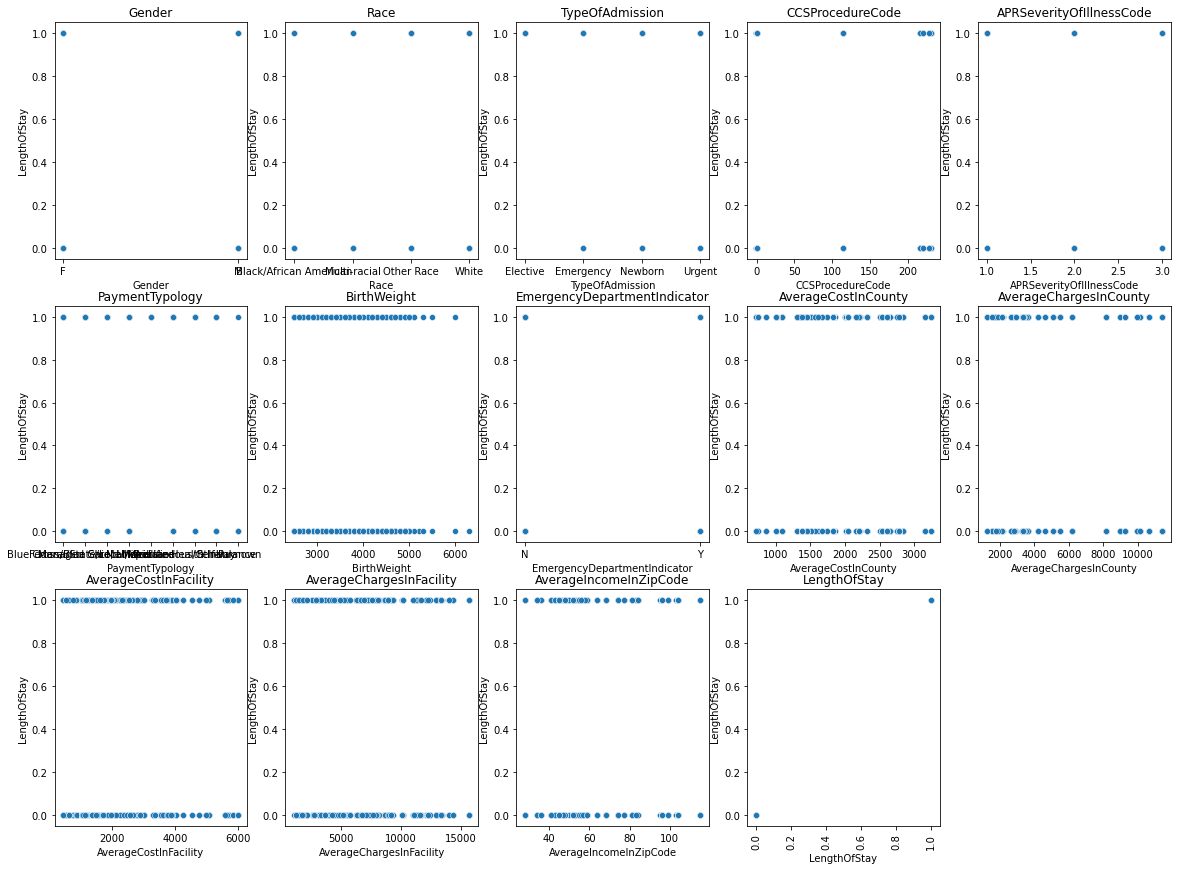

In [89]:
create_scatterplot_for_attributes(train_data_test_split)

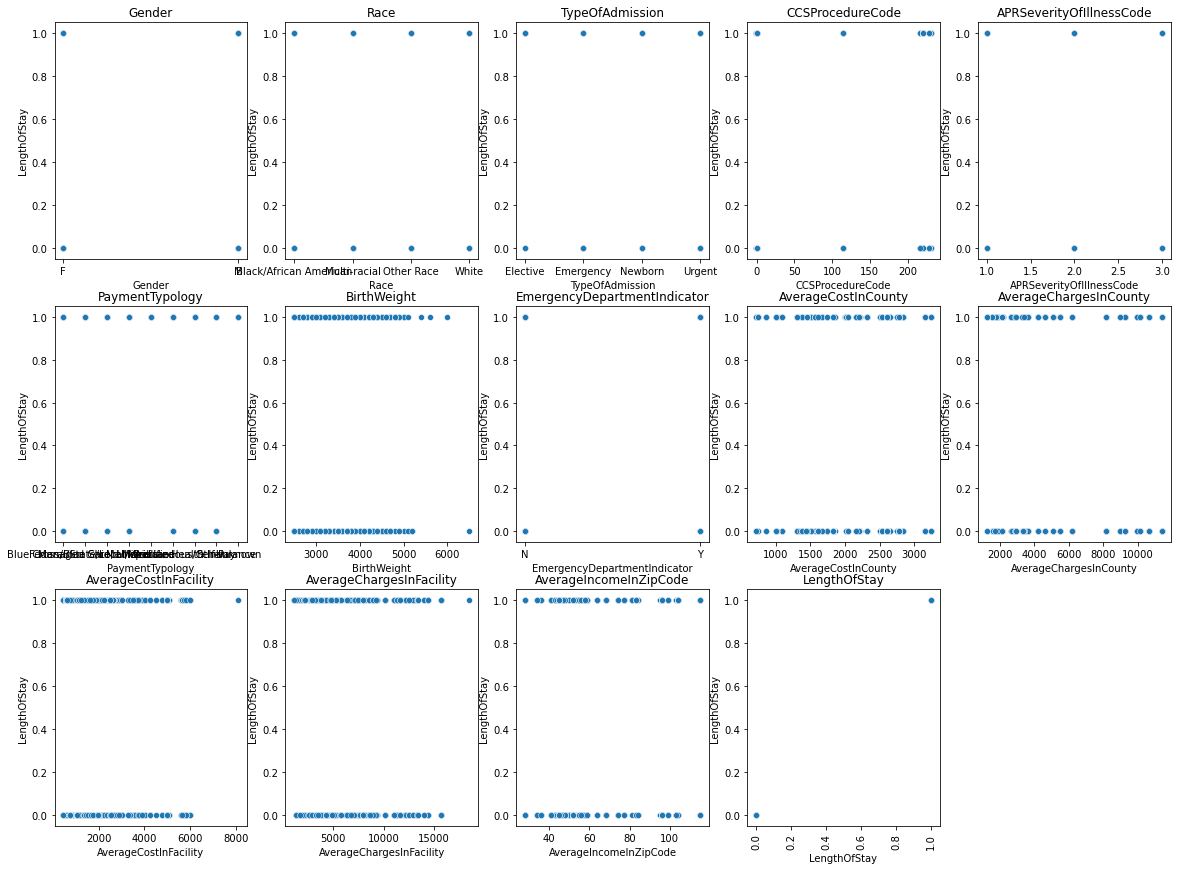

In [95]:
create_scatterplot_for_attributes(train_data_validate_split)

In [53]:
train_data_train_attributes = train_data_train_split.drop(['LengthOfStay',], axis=1).to_numpy()
train_data_train_target = train_data_train_split[['LengthOfStay']].to_numpy()

train_data_test_attributes = train_data_test_split.drop(['LengthOfStay',], axis=1).to_numpy()
train_data_test_target = train_data_test_split[['LengthOfStay']].to_numpy()

train_data_validate_attributes = train_data_validate_split.drop(['LengthOfStay',], axis=1).to_numpy()
train_data_validate_target = train_data_validate_split[['LengthOfStay']].to_numpy()

In [82]:
train_data_train_attributes.shape

(35979, 39)

In [55]:
train_data_test_attributes.shape

(11994, 39)

In [56]:
train_data_validate_attributes.shape

(11993, 39)

<a name="logistic_regression_polynomial"></a>
## Baseline Model
[To Table of Contents](#table_of_contents)

In [87]:
#%debug
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(train_data_train_attributes)

PolynomialFeatures()

In [88]:
poly.n_output_features_

820

In [89]:
poly.n_input_features_

39

In [91]:
train_data_train_attributes = poly.transform(train_data_train_attributes)
train_data_test_attributes = poly.transform(train_data_test_attributes)
train_data_validate_attributes = poly.transform(train_data_validate_attributes)

<a name="logistic_regression_feature_scaling"></a>
## Feature Scaling
[To Table of Contents](#table_of_contents)

- Given that many of the attributes are binary (such as the Gender attribute which was transformed into 3 boolean attributes for M, F and U) then I believe MinMax Scaling would be the way to go to ensure all attributes share the same range and thus should all be weighted evenly.

In [94]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(train_data_train_attributes)

train_data_train_attributes = min_max_scaler.transform(train_data_train_attributes)
train_data_test_attributes = min_max_scaler.transform(train_data_test_attributes)
train_data_validate_attributes = min_max_scaler.transform(train_data_validate_attributes)

### INCREASE MAX_ITER ONCE YOU HAVE EVERYTHING WORKING IF YOU HAVE TIME

In [95]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, penalty='none', solver='saga', 
                         max_iter=1000, 
                         class_weight='balanced').fit(train_data_train_attributes, train_data_train_target.ravel())

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [100]:
train_f1_score, validate_f1_score = get_f1_scores(clf, train_data_train_attributes, train_data_train_target, train_data_validate_attributes, train_data_validate_target)

In [101]:
print("Train F1-Score score: {:.3f}".format(train_f1_score))
print("Validation F1-Score score: {:.3f}".format(validate_f1_score))

Train F1-Score score: 0.623
Validation F1-Score score: 0.613


In [104]:
train_precision_score, validate_precision_score = get_precision_score(clf, (train_data_train_attributes, train_data_train_target), (train_data_validate_attributes, train_data_validate_target)

In [105]:
print("Train Precision score: {:.3f}".format(train_precision_score))
print("Validation Precison score: {:.3f}".format(validate_precision_score))

Train Precision score: 0.620
Validation Precison score: 0.610


<a name="logistic_regression_analysis"></a>
##  Logistic Regression Analysis
[To Table of Contents](#table_of_contents)

- Very small difference between training and validation
    - Good sign, means the algorithm has not over-fit to the training data
    - Regularisation not required in this case
- Actual score is quite low
    - Therefore the algorithm I have devised seems to be under-fitting
    - Solution to underfitting would be to increase the polynomial degree of my regression function
    
This approach is being abandoned due to issues with the PolynomialFeatures transform function.
train_data_train_attributes would have shape (35979, 39) and with a degree of 3, the transformed one has a shape of (35979, 11480) which has left me stumped as it shouldnt be increasing by such a large amount 

My design obviously has some issues as going above degree 2 causes errors due to the large size of the transformed attributes. Therefore improving my logisitic regression algorithm is impossible currently.



<a name="tree"></a>
# Approach Two: Decision Tree
[To Table of Contents](#table_of_contents)

In [19]:
decision_tree_train_data = train_data

In [9]:
# for i in train_data.index:
#     train_data.at[i, "LengthOfStay"]
#     if train_data.at[i, "LengthOfStay"] < 4:
#         train_data.at[i, "LengthOfStay"] = 1
#     else:
#         train_data.at[i, "LengthOfStay"] = 0

In [20]:
decision_tree_train_data["LengthOfStay"] = decision_tree_train_data["LengthOfStay"].astype("category")

In [21]:
decision_tree_train_data.head()

,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay,Gender_F,Gender_M,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,1,3700,2611,9227,1751,8951,45,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2900,3242,8966,3338,6409,34,1,0,1,...,0,0,1,0,0,0,0,0,1,0
2,1,3200,3155,11381,4980,9323,45,1,0,1,...,0,0,0,0,0,1,0,0,1,0
3,1,3300,3155,11381,5826,15680,59,1,1,0,...,0,0,0,0,0,1,0,0,1,0
4,1,2600,2611,9227,6000,14344,59,1,1,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
decision_tree_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59966 entries, 0 to 59965
Data columns (total 37 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   APRSeverityOfIllnessCode                   59966 non-null  int64   
 1   BirthWeight                                59966 non-null  int64   
 2   AverageCostInCounty                        59966 non-null  int64   
 3   AverageChargesInCounty                     59966 non-null  int64   
 4   AverageCostInFacility                      59966 non-null  int64   
 5   AverageChargesInFacility                   59966 non-null  int64   
 6   AverageIncomeInZipCode                     59966 non-null  int64   
 7   LengthOfStay                               59966 non-null  category
 8   Gender_F                                   59966 non-null  uint8   
 9   Gender_M                                   59966 non-null  uint8   
 10  Gender_U  

In [25]:
train_split, test_split, validate_split = split_data(decision_tree_train_data)

In [26]:
print(train_split.shape[0], test_split.shape[0], validate_split.shape[0])

35979 11994 11993


In [27]:
train_split_target = train_split["LengthOfStay"].to_numpy()
train_split_attributes = train_split.drop(columns="LengthOfStay", axis=1).to_numpy()

test_split_target = test_split["LengthOfStay"].to_numpy()
test_split_attributes = test_split.drop(columns="LengthOfStay", axis=1).to_numpy()

validate_split_target = validate_split["LengthOfStay"].to_numpy()
validate_split_attributes = validate_split.drop(columns="LengthOfStay", axis=1).to_numpy()

In [28]:
from sklearn import tree

tree_max_depth = 5
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=tree_max_depth, class_weight='balanced')
clf = clf.fit(train_split_attributes, train_split_target)

In [29]:
train_f1_score, validate_f1_score = get_f1_scores(clf, train_split_attributes, train_split_target, validate_split_attributes, validate_split_target)
train_precision_score, validate_precision_score = get_precision_score(clf, (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

In [36]:
print_eval_metrics(clf, ("Train", "Validation"), (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

Train f1 Score: 0.628
Train Precision Score: 0.622
Val f1 Score: 0.623
Val Precision Score: 0.617


<a name="tree_param_tune"></a>
## Hyper Parameter Tuning
[To Table of Contents](#table_of_contents)

- In the above example, 5 was chosen as an initial attempt for max tree depth
- To ensure the best value for max tree depth is found, we must test multiple values and attempt to find the best
    - Want to ensure neither over fitting nor under fitting

In [189]:
from sklearn.model_selection import GridSearchCV

start = 1
end = 1000
step = 50
max_depth_values = np.arange(start, end, step)

dt_clf = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
Gridclf = GridSearchCV(dt_clf, {"max_depth": max_depth_values, 'min_samples_split':np.arange(2,50,5)}, scoring='f1_macro')
Gridclf.fit(validate_split_attributes, validate_split_target)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='entropy'),
             param_grid={'max_depth': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951]),
                         'min_samples_split': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47])},
             scoring='f1_macro')

In [190]:
print(Gridclf.best_score_)
print(Gridclf.best_params_)

0.6141317209812096
{'max_depth': 1, 'min_samples_split': 2}


In [165]:
Gridclf.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=1)

In [188]:
pd.DataFrame(Gridclf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010110,0.000093,0.002809,0.000058,1,{'max_depth': 1},0.626462,0.614370,0.619343,0.611940,0.598545,0.614132,0.009241,1
1,0.068199,0.001552,0.003549,0.000055,51,{'max_depth': 51},0.581134,0.572416,0.575382,0.565799,0.565079,0.571962,0.006023,8
2,0.073573,0.011498,0.003504,0.000062,101,{'max_depth': 101},0.576569,0.571328,0.572349,0.568968,0.565521,0.570947,0.003663,10
3,0.068522,0.001763,0.003531,0.000052,151,{'max_depth': 151},0.576358,0.573822,0.568726,0.564686,0.554062,0.567531,0.007854,20
4,0.068404,0.001561,0.003503,0.000062,201,{'max_depth': 201},0.583797,0.575990,0.570303,0.566209,0.563906,0.572041,0.007170,7
5,0.068277,0.001946,0.003578,0.000032,251,{'max_depth': 251},0.580626,0.568653,0.570688,0.567072,0.568037,0.571015,0.004949,9
6,0.068489,0.001799,0.003547,0.000062,301,{'max_depth': 301},0.581636,0.566936,0.567874,0.576481,0.569859,0.572557,0.005633,6
7,0.068512,0.001796,0.003535,0.000058,351,{'max_depth': 351},0.584636,0.565227,0.570536,0.569273,0.559620,0.569858,0.008312,17
8,0.068358,0.001987,0.003576,0.000030,401,{'max_depth': 401},0.578465,0.562260,0.573902,0.571032,0.567313,0.570595,0.005537,13
9,0.068230,0.001862,0.003520,0.000051,451,{'max_depth': 451},0.583797,0.565383,0.574685,0.568489,0.559750,0.570421,0.008247,15


<a name="tree_analysis"></a>
## Decision Tree Analysis
[To Table of Contents](#table_of_contents)

My decision tree post hyper parameter tuning has a max depth of 1, which for a data set so complex I don't believe would be very effective, and the results show just that. 

Changing the step size and searching for a different max depth may be beneficial, however I feel it may be best to instead look into a random forrest, as the decision tree does not seem to be showing very good results, so I believe it would be better to attempt a forrest as by mixing multiple decision trees they can improve an algorithms performance. 

<a name="forrest"></a>
## Random Forrest
[To Table of Contents](#table_of_contents)

<a name="forrest_1"></a>
### Random Forrest Attempt 1
[To Table of Contents](#table_of_contents)

#### Max Depth Hyper Parameter

In [33]:
from sklearn.model_selection import GridSearchCV

start = 1
end = 1000
step = 50
max_depth_values = np.arange(start, end, step)

forrest_clf = RandomForestClassifier(n_estimators=500, class_weight='balanced_subsample', random_state=0)

Gridclf = GridSearchCV(forrest_clf, {"max_depth": max_depth_values}, scoring='f1_macro')
Gridclf.fit(validate_split_attributes, validate_split_target)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              n_estimators=500,
                                              random_state=0),
             param_grid={'max_depth': array([  1,  51, 101, 151, 201, 251, 301, 351, 401, 451, 501, 551, 601,
       651, 701, 751, 801, 851, 901, 951])},
             scoring='f1_macro')

In [27]:
Gridclf.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=51,
                       n_estimators=500, random_state=0)

In [28]:
forrest_train_f1_score, forrest_validate_f1_score = get_f1_scores(Gridclf.best_estimator_, train_split_attributes, train_split_target, validate_split_attributes, validate_split_target)
forrest_train_precision_score, forrest_validate_precision_score = get_precision_score(Gridclf.best_estimator_, (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

In [23]:
print("Train f1 score: {:.3f}".format(forrest_train_f1_score))
print("Validation f1 score: {:.3f}".format(forrest_validate_f1_score))
print("Train precison score: {:.3f}".format(forrest_train_precision_score))
print("Validation precison score: {:.3f}".format(forrest_validate_precision_score))

Train f1 score: 0.645
Validation f1 score: 0.731
Train precison score: 0.632
Validation precison score: 0.708


#### Notes on hyper-parameter tuning
With the above hyper-parameter tuning my algorithm improved somewhat for the validation, so I decided to see how the the max depth of 51 would go in a random forrest fit to the training split

In [35]:
from sklearn.ensemble import RandomForestClassifier

forrest_clf = RandomForestClassifier(max_depth=51, n_estimators=500, class_weight='balanced_subsample', random_state=0)
forrest_clf.fit(train_split_attributes, train_split_target)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=51,
                       n_estimators=500, random_state=0)

In [40]:
forrest_train_f1_score, forrest_validate_f1_score = get_f1_scores(forrest_clf, train_split_attributes, train_split_target, validate_split_attributes, validate_split_target)
forrest_train_precision_score, forrest_validate_precision_score = get_precision_score(forrest_clf, (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

In [41]:
print("Train f1 score: {:.3f}".format(forrest_train_f1_score))
print("Validation f1 score: {:.3f}".format(forrest_validate_f1_score))
print("Train precison score: {:.3f}".format(forrest_train_precision_score))
print("Validation precison score: {:.3f}".format(forrest_validate_precision_score))

Train f1 score: 0.916
Validation f1 score: 0.591
Train precison score: 0.894
Validation precison score: 0.599


#### Notes on using 51 as max depth
Score improved, however now it seems to have overfit. Validation score went down and there is now a large gap bewteen the two

Post pruning of the tree could improve it by reducing how much it has overfit to the training data. 

For now however, I want to see if another max depth could be used instead.

<a name="forrest_2"></a>
### Random Forrest Attempt 2
[To Table of Contents](#table_of_contents)

- With 51 chosen as the max depth by the previous search, I felt a more precise search through the numbers around 50 would be good in case my step size missed the best max tree depth

#### Searching for different hyper parameter

In [20]:
from sklearn.model_selection import GridSearchCV

start = 1
end = 100
step = 5
max_depth_values = np.arange(start, end, step)

forrest_clf2 = RandomForestClassifier(n_estimators=500, class_weight='balanced_subsample', random_state=0)

Gridclf2 = GridSearchCV(forrest_clf2, {"max_depth": max_depth_values}, scoring='f1_macro')
Gridclf2.fit(validate_split_attributes, validate_split_target)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              n_estimators=500,
                                              random_state=0),
             param_grid={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])},
             scoring='f1_macro')

In [21]:
Gridclf2.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       n_estimators=500, random_state=0)

In [22]:
forrest_train_f1_score_2, forrest_validate_f1_score_2 = get_f1_scores(Gridclf2.best_estimator_, train_split_attributes, train_split_target, validate_split_attributes, validate_split_target)
forrest_train_precision_score_2, forrest_validate_precision_score_2 = get_precision_score(Gridclf2.best_estimator_, (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

In [23]:
print("Train f1 score: {:.3f}".format(forrest_train_f1_score_2))
print("Validation f1 score: {:.3f}".format(forrest_validate_f1_score_2))
print("Train precison score: {:.3f}".format(forrest_train_precision_score_2))
print("Validation precison score: {:.3f}".format(forrest_validate_precision_score_2))

Train f1 score: 0.645
Validation f1 score: 0.731
Train precison score: 0.632
Validation precison score: 0.708


#### Notes on new max depth hyper paramter
- This time, 11 was found to be the best value for the max depth paramter
- My scores in different trees have turned out quite similar
    - Both max depth of 11 and 51 have the same Precisions and F1 Scores when a random forrest is fit to validation

#### Random Forrest Using Max Depth of 11

- I will now attempt the depth of 11 on a random forrest fit to the training data to see how it manages compared to 51
    - Following the principle of occam's razor, the more simple tree would be preferred, but we should first test it

In [39]:
from sklearn.ensemble import RandomForestClassifier

forrest_clf_2 = RandomForestClassifier(max_depth=11, n_estimators=500, class_weight='balanced_subsample', random_state=0)
forrest_clf_2.fit(train_split_attributes, train_split_target)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       n_estimators=500, random_state=0)

In [44]:
forrest_train_f1_score_3, forrest_validate_f1_score_3 = get_f1_scores(forrest_clf_2, (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))
forrest_train_precision_score_3, forrest_validate_precision_score_3 = get_precision_score(forrest_clf_2, )

In [40]:
print_eval_metrics(forrest_clf_2, ("Train", "Validate"), (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

Train f1 Score: 0.672
Train Precision Score: 0.658
Validate f1 Score: 0.639
Validate Precision Score: 0.629


#### Notes on Max depth of 11
Reducing the complexity of the tree has helped reduce the overfitting to the training data as seen in attempt 1, however my scores have not improved much and are still much lower than I would want.


<a name="forrest_3"></a>
### Random Forrest Attempt 3
[To Table of Contents](#table_of_contents)

#### Searching nearby max depth options

- this test is me trying to see if there are any values closer to 11 that could be better that were skipped by the previous step size
- the steps were as follows when 11 was found: [6, 11, 16]
    - So I will search just before 6 and just after 16 to see if they trend down but where skipped by the step sizes

In [46]:
from sklearn.model_selection import GridSearchCV

start = 5
end = 17
step = 1
max_depth_values = np.arange(start, end, step)

forrest_clf_4 = RandomForestClassifier(n_estimators=500, class_weight='balanced_subsample', random_state=0)

Gridclf_4 = GridSearchCV(forrest_clf_4, {"max_depth": max_depth_values}, scoring='f1_macro')
Gridclf_4.fit(validate_split_attributes, validate_split_target)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced_subsample',
                                              n_estimators=500,
                                              random_state=0),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])},
             scoring='f1_macro')

In [47]:
Gridclf_4.best_estimator_

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       n_estimators=500, random_state=0)

#### Notes on searching nearby 11
- Grown more confidant with max depth of 11 now as it was chosen once again
- Nearby values do not improve, making me believe 11 is at least a local minima if this were to be graphed

### Increasing Random Tree Estimators
- Since 11 seems to be a good max depth, I will try increasing how many trees are used in this forrest to see if it helps improve my algorithms predictions

In [37]:
from sklearn.ensemble import RandomForestClassifier

estimator_increase_clf = RandomForestClassifier(max_depth=11, n_estimators=750, class_weight='balanced_subsample', random_state=0)
estimator_increase_clf.fit(train_split_attributes, train_split_target)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       n_estimators=750, random_state=0)

In [38]:
print_eval_metrics(estimator_increase_clf, ("Train", "Validate"), (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

Train f1 Score: 0.673
Train Precision Score: 0.659
Validate f1 Score: 0.638
Validate Precision Score: 0.628


#### Notes on Increasing Estimators to 750
- Only minor change in scores
- Further estimator increases will be attempted to see if a larger number will do much

In [41]:
from sklearn.ensemble import RandomForestClassifier

estimator_increase_clf_2 = RandomForestClassifier(max_depth=11, n_estimators=1250, class_weight='balanced_subsample', random_state=0)
estimator_increase_clf_2.fit(train_split_attributes, train_split_target)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       n_estimators=1250, random_state=0)

In [42]:
print_eval_metrics(estimator_increase_clf_2, ("Train", "Validate"), (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

Train f1 Score: 0.673
Train Precision Score: 0.659
Validate f1 Score: 0.638
Validate Precision Score: 0.629


#### Notes on Further Increasing Estimators to 1250
- Once again no noteable change
- Seems as though increasing estimators will not improve my algorithm

In [43]:
from sklearn.ensemble import RandomForestClassifier

estimator_increase_clf_3 = RandomForestClassifier(max_depth=11, n_estimators=2000, class_weight='balanced_subsample', random_state=0)
estimator_increase_clf_3.fit(train_split_attributes, train_split_target)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=11,
                       n_estimators=2000, random_state=0)

In [45]:
test1, test2 = print_eval_metrics(estimator_increase_clf_3, ("Train", "Validate"), (train_split_attributes, train_split_target), (validate_split_attributes, validate_split_target))

Train f1 Score: 0.674
Train Precision Score: 0.659
Validate f1 Score: 0.639
Validate Precision Score: 0.629


#### Notes on Further Increasing Estimators to 2000
- Once again no noteable change
- Seems as though increasing estimators will not improve my algorithm